In [1]:
# Cell 0
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

RAW = Path("data/raw/AmesHousing.csv")
# PROC = Path("data/processed/houses_processed.csv")

df = pd.read_csv("data/raw/house_prices.csv")

In [2]:
print("Shape:", df.shape)
print("Columns:", df.columns.to_list())
df.head(5)

Shape: (2930, 82)
Columns: ['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area', 'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style', 'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', 'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional', 'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt', 'Garage Finish', 'Garage Cars', 'Garage Area', 'Garage Qual', 'Garage Cond',

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [3]:
def normalize_columns(cols):
    return [c.strip().lower().replace(" ", "_").replace("/", "_").replace("-", "_") for c in cols]

df.columns = normalize_columns(df.columns)  
print("Normalized Columns:", df.columns.to_list())

Normalized Columns: ['order', 'pid', 'ms_subclass', 'ms_zoning', 'lot_frontage', 'lot_area', 'street', 'alley', 'lot_shape', 'land_contour', 'utilities', 'lot_config', 'land_slope', 'neighborhood', 'condition_1', 'condition_2', 'bldg_type', 'house_style', 'overall_qual', 'overall_cond', 'year_built', 'year_remod_add', 'roof_style', 'roof_matl', 'exterior_1st', 'exterior_2nd', 'mas_vnr_type', 'mas_vnr_area', 'exter_qual', 'exter_cond', 'foundation', 'bsmt_qual', 'bsmt_cond', 'bsmt_exposure', 'bsmtfin_type_1', 'bsmtfin_sf_1', 'bsmtfin_type_2', 'bsmtfin_sf_2', 'bsmt_unf_sf', 'total_bsmt_sf', 'heating', 'heating_qc', 'central_air', 'electrical', '1st_flr_sf', '2nd_flr_sf', 'low_qual_fin_sf', 'gr_liv_area', 'bsmt_full_bath', 'bsmt_half_bath', 'full_bath', 'half_bath', 'bedroom_abvgr', 'kitchen_abvgr', 'kitchen_qual', 'totrms_abvgrd', 'functional', 'fireplaces', 'fireplace_qu', 'garage_type', 'garage_yr_blt', 'garage_finish', 'garage_cars', 'garage_area', 'garage_qual', 'garage_cond', 'paved

In [4]:
missing_counts = df.isna().sum().sort_values(ascending=False)
print("Top missing Values:\n", missing_counts[missing_counts > 0].head(10))
df[['gr_liv_area','overall_qual','year_built','garage_cars','saleprice']].describe()

Top missing Values:
 pool_qc          2917
misc_feature     2824
alley            2732
fence            2358
mas_vnr_type     1775
fireplace_qu     1422
lot_frontage      490
garage_cond       159
garage_finish     159
garage_yr_blt     159
dtype: int64


,gr_liv_area,overall_qual,year_built,garage_cars,saleprice
count,2930.000000,2930.000000,2930.000000,2929.000000,2930.000000
mean,1499.690444,6.094881,1971.356314,1.766815,180796.060068
std,505.508887,1.411026,30.245361,0.760566,79886.692357
min,334.000000,1.000000,1872.000000,0.000000,12789.000000
25%,1126.000000,5.000000,1954.000000,1.000000,129500.000000
50%,1442.000000,6.000000,1973.000000,2.000000,160000.000000
75%,1742.750000,7.000000,2001.000000,2.000000,213500.000000
max,5642.000000,10.000000,2010.000000,5.000000,755000.000000


In [5]:
# rename ambiguous names consistently if needed

df = df.rename(columns= {
    '1st_flr_sf':'first_flr_sf',
    '2nd_flr_sf':'second_flr_sf',
    'totrms_abvgrd':'totrms_abvgrd'
})

# create total_sf:

df['total_sf'] = df[['total_bsmt_sf','first_flr_sf','second_flr_sf']].fillna(0).sum(axis=1)

features = ['gr_liv_area','overall_qual','year_built','garage_cars','total_bsmt_sf','first_flr_sf','second_flr_sf','total_sf','full_bath','totrms_abvgrd']

x = df[features]
y = df['saleprice']

In [6]:
# Numeric imputation
num_cols = x.select_dtypes(include=[np.number]).columns.tolist()
for c in num_cols:
    median = x[c].median()
    x[c] = x[c].fillna(median)
    
# Final confirm
print("Missing after imputation:\n", x.isna().sum().sum())

Missing after imputation:
 0


C:\Users\Aayush.Thakkar\AppData\Local\Temp\ipykernel_17784\1421961538.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[c] = x[c].fillna(median)


In [7]:
# Cell 6
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape)

(2344, 10) (586, 10)


In [8]:
model = LinearRegression()
model.fit(X_train, y_train)
coef = dict(zip(X_train.columns, model.coef_))
print("Intercept:", model.intercept_)
print("Coefficients:", coef)

Intercept: -781167.0689839895
Coefficients: {'gr_liv_area': np.float64(27.340410020377032), 'overall_qual': np.float64(20808.84091781986), 'year_built': np.float64(362.91374659008585), 'garage_cars': np.float64(12982.264719626073), 'total_bsmt_sf': np.float64(10.676748625617853), 'first_flr_sf': np.float64(38.08408068933755), 'second_flr_sf': np.float64(24.815630759189464), 'total_sf': np.float64(8.711091474634925), 'full_bath': np.float64(-6637.292976229914), 'totrms_abvgrd': np.float64(-3159.720017882512)}


In [14]:
y_pred = model.predict(X_test)
y_pred = np.maximum(y_pred, 0)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

Mean Squared Error: 1603162339.0340726
R^2 Score: 0.8000433108913687


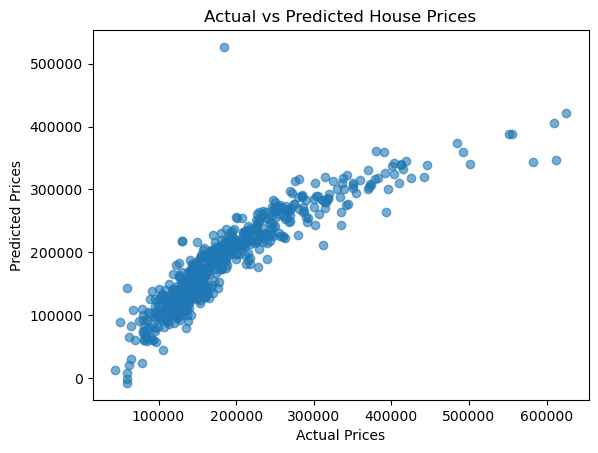

In [10]:
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.show()

In [13]:
# Save Processed Data

processed = X_test.copy()
processed['Actual'] = y_test
processed['Predicted'] = np.maximum(y_pred, 0)
processed.to_csv("data/processed/houses_processed.csv", index=False)